In [11]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
import io


class ExtractExudates:
    
    jpegImg = 0
    grayImg = 0
    curImg = 0
    def __init__(self,image):
        self.setImage(image)
        self.greenComp()
        self.applyCLAHE()
        self.applyDilation()
        self.applyThreshold()
        self.applyMedianFilter()

    def setImage(self, img):
        self.jpegImg = img
        print("Test")
        self.curImg = np.array(img)
        print(self.curImg)
        
        ##Convert jpegFile to numpy array (Required for CV2)

    def getImage(self):
        return self.curImg
        
    def greenComp(self):
    ###Extracting Green Component
        gcImg = self.curImg[:,:,1]
        self.curImg = gcImg

    def applyCLAHE(self):
    #Applying Contrast Limited Adaptive Histogram Equalization (CLAHE)
        clahe = cv2.createCLAHE()
        clImg = clahe.apply(self.curImg)
        self.curImg = clImg
        
# create a CLAHE object (Arguments are optional).
#clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
#claheImg = clahe.apply(clImg)
#cv2.imwrite('clahe_2.jpg',claheImg)

    def applyDilation(self):
        #Creating Structurig Element
        strEl = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(6,6))
        #Dilation
        dilateImg = cv2.dilate(self.curImg, strEl)
        self.curImg = dilateImg

    def applyThreshold(self):
        #Thresholding with Complement/Inverse
        ret,threshImg = cv2.threshold(self.curImg, 240,240, cv2.THRESH_BINARY, 2)
        self.curImg = threshImg

    def applyMedianFilter(self):
        #Median Filtering
        medianImg = cv2.medianBlur(self.curImg,5)
        self.curImg = medianImg

In [12]:
image = cv2.imread("ODmasked-image-289 (1).png")
a= ExtractExudates(image);


Test
[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


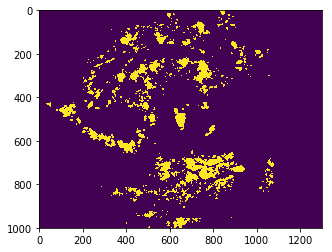

In [13]:
j=a.getImage()
plt.imshow(j)